<a href="https://colab.research.google.com/github/vpatil2209/Machine_Learning/blob/master/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('datasets_33180_43520_heart.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
cor = df.corr()
print(cor)

               age       sex        cp  ...        ca      thal    target
age       1.000000 -0.098447 -0.068653  ...  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353  ...  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  ... -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  ...  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  ...  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  ...  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421  ... -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762  ... -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  ...  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  ...  0.222682  0.210244 -0.430696
slope    -0.168814 -0.030711  0.119717  ... -0.080155 -0.104764  0.345877
ca        0.276326  0.118261 -0.181053  ...  1.000000  0.151832 -0.391724
thal      0.068001  0.210041 -0.161736

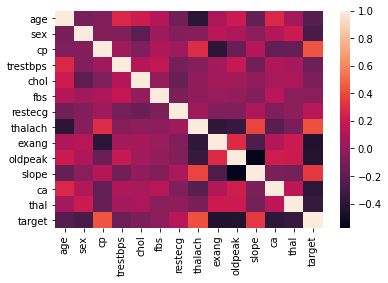

In [5]:
sns.heatmap(cor, fmt = '')

In [12]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Accuracy Score :  0.8552631578947368
Confusion Matrix :  [[28  5]
 [ 6 37]]


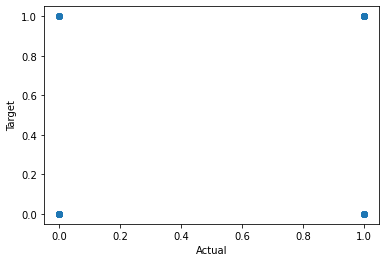

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuaracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuaracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', cm)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Target')
plt.show()

# ***Random Forest Classifier***

Accuracy Score :  0.8421052631578947
Confusion Matrix :  [[26  7]
 [ 5 38]]


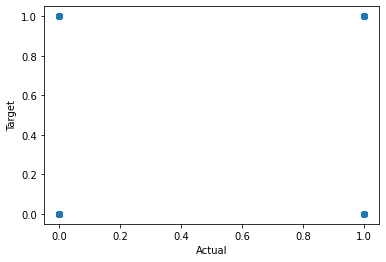

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuaracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuaracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', cm)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Target')
plt.show()

# ***Naive Bayes Classifier***

Accuracy Score :  0.7894736842105263
Confusion Matrix :  [[25  8]
 [ 8 35]]


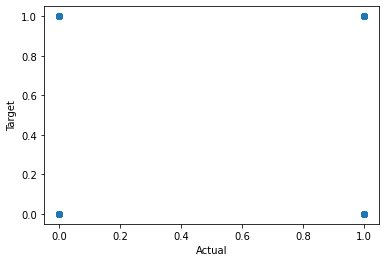

In [19]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuaracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuaracy)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', cm)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Target')
plt.show()